In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Social_Network_Ads.csv')

In [3]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
#label encoding fro Gender
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
data['Gender']=le.fit_transform(data.Gender.values)
data.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [16]:
X=data[['Gender','Age','EstimatedSalary']]
y=data[['Purchased']]

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train,x_test)
x_test=scaler.fit_transform(y_train)

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=6,random_state=42)
dtc

DecisionTreeClassifier(max_depth=6, random_state=42)

In [30]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

[Text(0.44, 0.9285714285714286, 'Age <= 0.65\ngini = 0.46\nsamples = 320\nvalue = [205, 115]\nclass = Not Purchesed'),
 Text(0.2, 0.7857142857142857, 'EstimatedSalary <= 0.588\ngini = 0.3\nsamples = 234\nvalue = [191, 43]\nclass = Not Purchesed'),
 Text(0.32, 0.8571428571428572, 'True  '),
 Text(0.08, 0.6428571428571429, 'Age <= -0.135\ngini = 0.07\nsamples = 193\nvalue = [186.0, 7.0]\nclass = Not Purchesed'),
 Text(0.04, 0.5, 'gini = 0.0\nsamples = 126\nvalue = [126, 0]\nclass = Not Purchesed'),
 Text(0.12, 0.5, 'EstimatedSalary <= 0.385\ngini = 0.187\nsamples = 67\nvalue = [60, 7]\nclass = Not Purchesed'),
 Text(0.08, 0.35714285714285715, 'EstimatedSalary <= -0.081\ngini = 0.165\nsamples = 66\nvalue = [60, 6]\nclass = Not Purchesed'),
 Text(0.04, 0.21428571428571427, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]\nclass = Not Purchesed'),
 Text(0.12, 0.21428571428571427, 'Age <= 0.356\ngini = 0.298\nsamples = 33\nvalue = [27, 6]\nclass = Not Purchesed'),
 Text(0.08, 0.07142857142857142, 

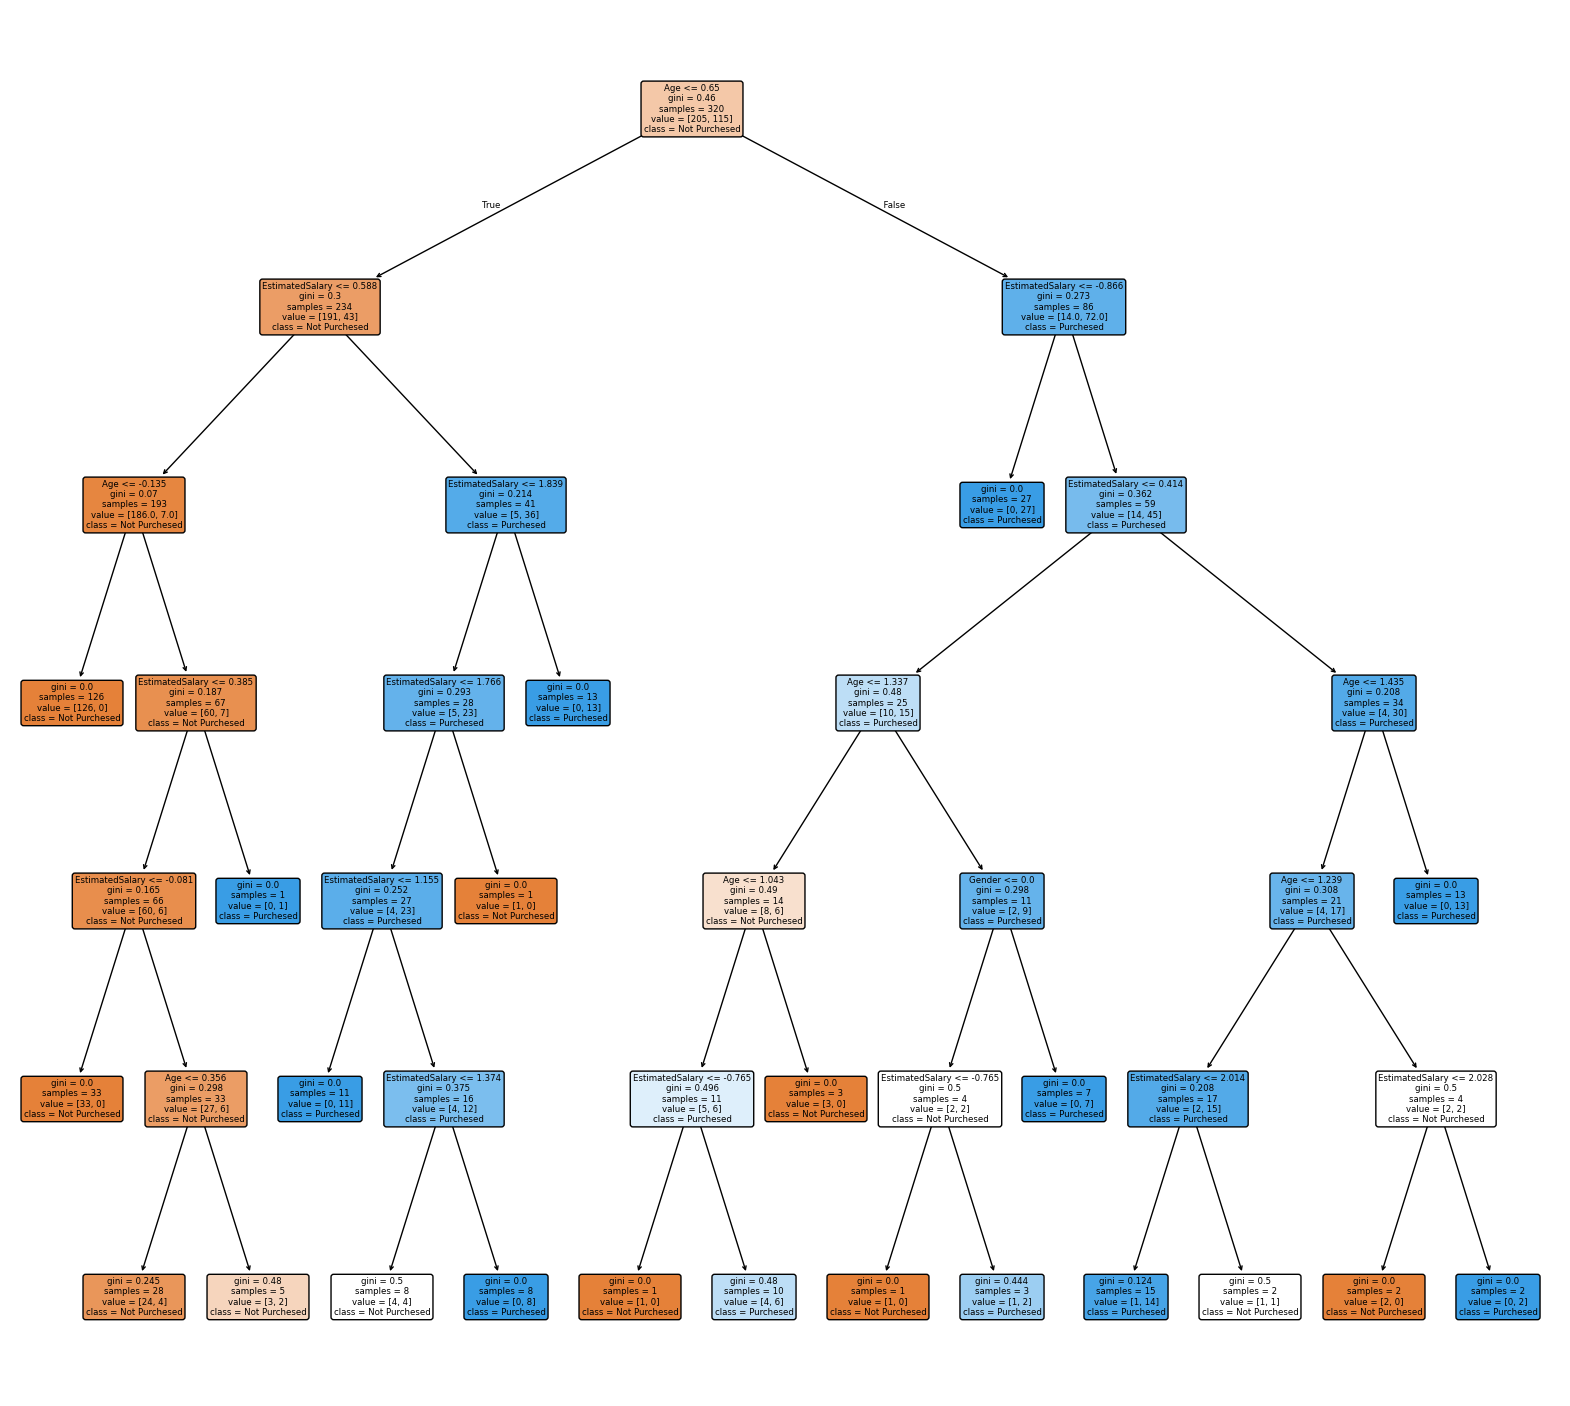

In [31]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,18))
plot_tree(dtc,filled=True,feature_names=['Gender','Age','EstimatedSalary'],class_names=['Not Purchesed','Purchesed'],rounded=True)